In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os.path  
import glob
import sys

讀取訓練資料(網路上下載並經由篩選過後的照片)，並完成標記
訓練資料:
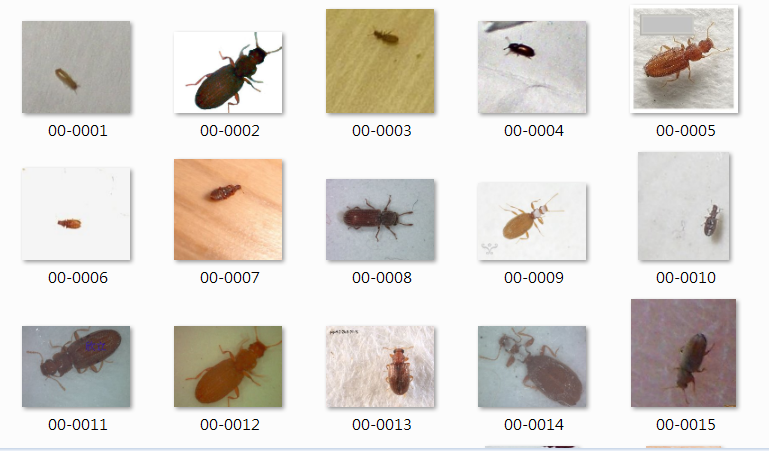

In [3]:
file = glob.glob('trainData/*.jpg')
ImgArr = [0]
OutArr = [0]
for i in file:
    pathname, filename = os.path.split(i)
    A = Image.open(i)
    A = A.convert('L') #轉黑白
    A = A.resize((128,128),Image.BILINEAR) #更改圖片大小
    A = np.array(A) #轉成矩陣
    ImgArr.append(A)
    if(int(filename[:2]) == 0):
        OutArr.append([1,0,0,0,0,0,0])
    elif(int(filename[:2]) == 1):
        OutArr.append([0,1,0,0,0,0,0])
    elif(int(filename[:2]) == 2):
        OutArr.append([0,0,1,0,0,0,0])
    elif(int(filename[:2]) == 3):
        OutArr.append([0,0,0,1,0,0,0])
    elif(int(filename[:2]) == 4):
        OutArr.append([0,0,0,0,1,0,0])
    elif(int(filename[:2]) == 5):
        OutArr.append([0,0,0,0,0,1,0])
    elif(int(filename[:2]) == 6):
        OutArr.append([0,0,0,0,0,0,1])

C:\Users\james\Anaconda3\lib\site-packages\PIL\Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


測試圖片格式是否符合需求

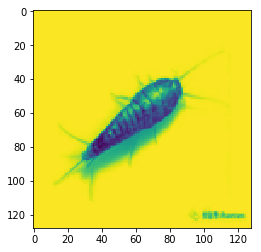

In [4]:
plt.imshow(ImgArr[290])

In [5]:
OutArr[290]

[0, 0, 0, 0, 0, 1, 0]

In [6]:
len(ImgArr)

345

刪除第一筆資料(第一筆是None)

In [7]:
del ImgArr[0]

In [8]:
del OutArr[0]

In [9]:
len(ImgArr)

344

轉換成CNN要求的格式

In [10]:
ImgArr = np.array(ImgArr)
ImgArr_1 = ImgArr.reshape(344, 128, 128, 1)
ImgArr_1 = ImgArr_1/255

In [11]:
OutArr = np.array(OutArr)

In [12]:
ImgArr_1[290]

array([[[0.63921569],
        [0.63921569],
        [0.63921569],
        ...,
        [0.61176471],
        [0.61176471],
        [0.61176471]],

       [[0.63921569],
        [0.63921569],
        [0.63921569],
        ...,
        [0.61176471],
        [0.61176471],
        [0.61176471]],

       [[0.63921569],
        [0.63921569],
        [0.63921569],
        ...,
        [0.61176471],
        [0.61176471],
        [0.61176471]],

       ...,

       [[0.71372549],
        [0.71372549],
        [0.71372549],
        ...,
        [0.69019608],
        [0.68627451],
        [0.69019608]],

       [[0.71372549],
        [0.71372549],
        [0.71372549],
        ...,
        [0.69019608],
        [0.68627451],
        [0.69019608]],

       [[0.71372549],
        [0.71372549],
        [0.71372549],
        ...,
        [0.69019608],
        [0.68627451],
        [0.69019608]]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


多次修改參數後得到最佳模型(三層CNN)

In [19]:
model = Sequential()
model.add(Conv2D(4,(5,5), padding='same',input_shape=(128,128,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8,(5,5), padding='same',))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5), padding='same',))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 4)       104       
_________________________________________________________________
activation_6 (Activation)    (None, 128, 128, 4)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 8)         808       
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        3216      
__________

In [21]:
model.compile(loss='mse', optimizer = 'Adam', metrics = ['accuracy'])

每次訓練100次，訓練900次後達到0.6279正確率

In [55]:
model.fit(ImgArr_1, OutArr, batch_size = 100,epochs=100)

Epoch 1/100
344/344 [==============================] - 5s 14ms/step - loss: 0.0584 - acc: 0.6366
Epoch 2/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 3/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 4/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 5/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 6/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 7/100
344/344 [==============================] - 5s 13ms/step - loss: 0.0584 - acc: 0.6366
Epoch 8/100
344/344 [==============================] - 5s 16ms/step - loss: 0.0584 - acc: 0.6366
Epoch 9/100
344/344 [==============================] - 5s 16ms/step - loss: 0.0584 - acc: 0.6366
Epoch 10/100
344/344 [==============================] - 5s 16ms/step - loss: 0.0584 - acc: 0.6366
Epoch 11/100
344/344 [=======

In [14]:
from keras.models import model_from_json

model = model_from_json(open('model.json').read())
model.load_weights('model_weights.h5')
model.compile(loss='mse', optimizer = 'Adam', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model_1_json = model.to_json()
open('model_1.json', 'w').write(model_1_json)
model.save_weights('model_1_weights.h5')

載入測試資料

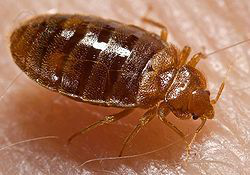

In [30]:
jpg_1 = Image.open('testData/12-0001.jpg')
jpg_1

In [31]:
jpg_1 = jpg_1.convert('L') 
jpg_1 = jpg_1.resize((128,128),Image.BILINEAR) 
jpg_1 = np.array(jpg_1) 
jpg_1 = jpg_1.reshape(1,128,128,1)
jpg_1 = jpg_1/255
jpg_1

array([[[[0.70196078],
         [0.70196078],
         [0.70196078],
         ...,
         [0.69803922],
         [0.71372549],
         [0.71764706]],

        [[0.70588235],
         [0.70588235],
         [0.69803922],
         ...,
         [0.69411765],
         [0.71372549],
         [0.72941176]],

        [[0.69803922],
         [0.70196078],
         [0.70196078],
         ...,
         [0.69019608],
         [0.70588235],
         [0.72941176]],

        ...,

        [[0.6       ],
         [0.56078431],
         [0.55686275],
         ...,
         [0.70588235],
         [0.74509804],
         [0.7372549 ]],

        [[0.65882353],
         [0.58431373],
         [0.57647059],
         ...,
         [0.72156863],
         [0.70980392],
         [0.71764706]],

        [[0.67843137],
         [0.60784314],
         [0.56470588],
         ...,
         [0.74901961],
         [0.70196078],
         [0.70980392]]]])

In [32]:
predict = model.predict(jpg_1)
predict

array([[0.20577317, 0.0167103 , 0.24219052, 0.14810692, 0.19717343,
        0.01203442, 0.17801127]], dtype=float32)

In [33]:
def 辨識居家蟲類(X):
    A = X[0]
    MAX = 0
    K = 0
    for i in range(0,6):
        if(A[i] >= MAX):
            MAX = A[i]
            K = i
    if(K == 0):
        return "姬薪蟲"
    elif(K == 1):
        return "隱翅蟲"
    elif(K == 2):
        return "床蝨"
    elif(K == 3):
        return "衣蛾"
    elif(K == 4):
        return "衣蛾"
    elif(K == 5):
        return "衣魚"
    elif(K == 6):
        return "蛾蚋"

In [34]:
辨識居家蟲類(predict)

'床蝨'

再測試多張網路上下載的照片

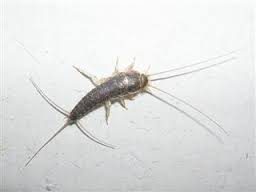

In [55]:
jpg_2 = Image.open('testData/15-0001.jpg')
jpg_2

In [56]:
jpg_2 = jpg_2.convert('L') 
jpg_2 = jpg_2.resize((128,128),Image.BILINEAR) 
jpg_2 = np.array(jpg_2) 
jpg_2 = jpg_2.reshape(1,128,128,1)
jpg_2 = jpg_2/255

In [57]:
辨識居家蟲類(model.predict(jpg_2))#正確

'衣魚'

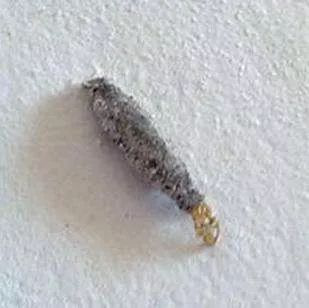

In [58]:
jpg_2 = Image.open('testData/14-0001.jpeg')
jpg_2

In [59]:
jpg_2 = jpg_2.convert('L') 
jpg_2 = jpg_2.resize((128,128),Image.BILINEAR) 
jpg_2 = np.array(jpg_2) 
jpg_2 = jpg_2.reshape(1,128,128,1)
jpg_2 = jpg_2/255

In [60]:
辨識居家蟲類(model.predict(jpg_2))#錯誤

'衣魚'

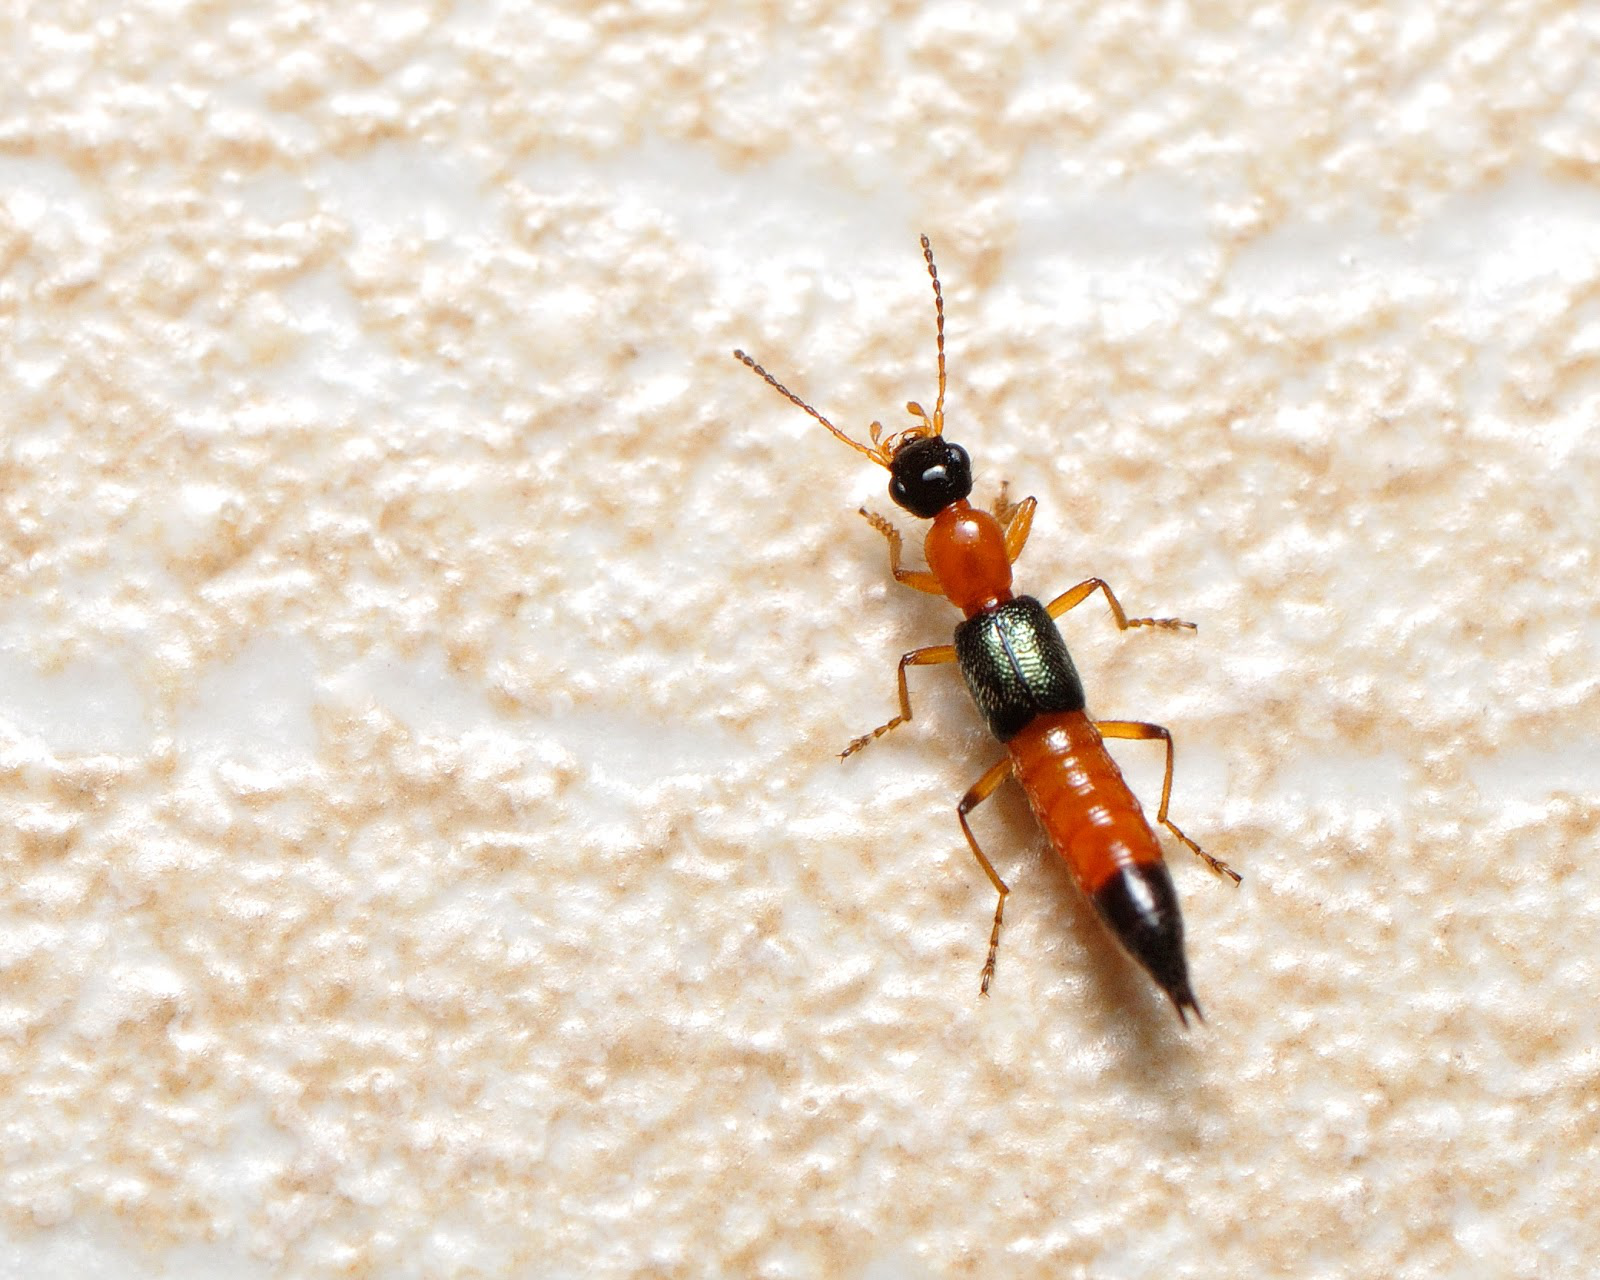

In [61]:
jpg_2 = Image.open('testData/11-0002.jpg')
jpg_2

In [62]:
jpg_2 = jpg_2.convert('L') 
jpg_2 = jpg_2.resize((128,128),Image.BILINEAR) 
jpg_2 = np.array(jpg_2) 
jpg_2 = jpg_2.reshape(1,128,128,1)
jpg_2 = jpg_2/255

In [64]:
辨識居家蟲類(model.predict(jpg_2))#正確

'隱翅蟲'

總結:
正確率僅有六成，可能的原因:
    1.訓練資料不夠多(只有344張照片)
    2.為符合CNN模型，先將照片轉成黑白並轉成128x128矩陣，畫質可能不夠高
    3.同一種蟲類圖片差異太大(有大有小，有些有背景干擾)